In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [4]:
#Importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


In [5]:
#to ensure the GPU is present

import tensorflow as tf

# ✅ Always do this FIRST before anything else TensorFlow-related
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("✅ GPU is Available and memory growth is set.")
    except RuntimeError as e:
        print("⚠️ RuntimeError:", e)
else:
    print("❌ GPU not found")



✅ GPU is Available and memory growth is set.


In [6]:
#Load and explore dataset
train_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
test_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"
val_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"

In [7]:
#List all classes
import os

train_dir = "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"

classes = os.listdir(train_dir)
num_classes = len(classes)

print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')



Number of Classes: 2
Classes: ['nofire', 'fire']


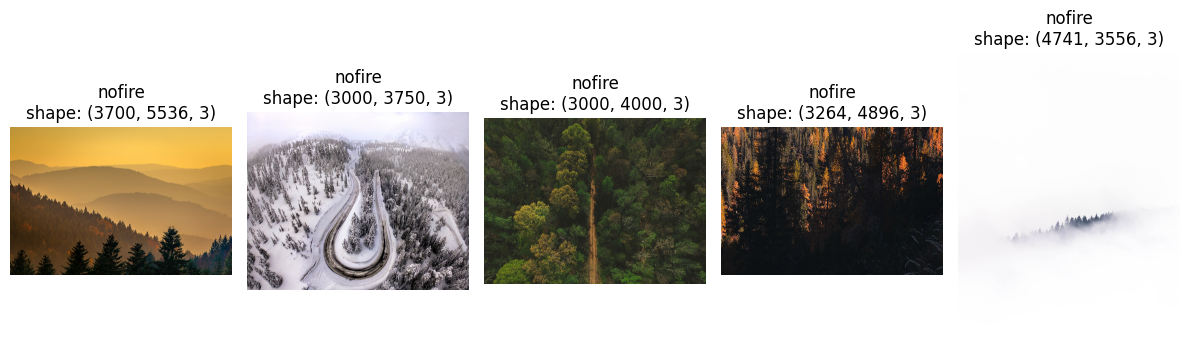

In [8]:
#Visualize images in the dataset
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12, 10))

# Show 5 images from the first class
for i in range(5):
    class_path = os.path.join(train_dir, classes[0])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)

    img = mpimg.imread(img_path)  # ✅ read the image

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[0]}\nshape: {img.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()


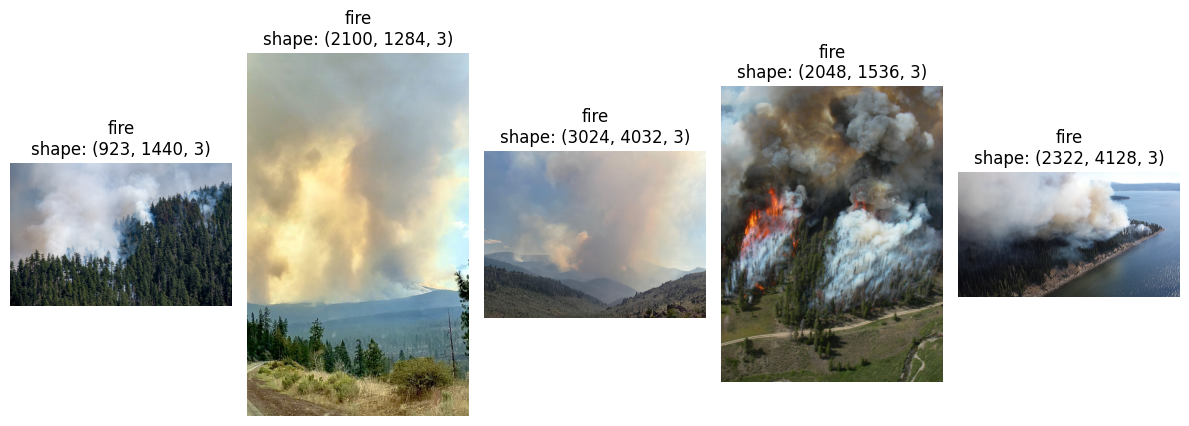

In [9]:
plt.figure(figsize=(12, 10))

# Show 5 images from the first class
for i in range(5):
    class_path = os.path.join(train_dir, classes[1])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)

    img = mpimg.imread(img_path)  # ✅ read the image

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[1]}\nshape: {img.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Preprocessing # Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 #there will be 32 images in batch
#Data generators
train_generator = ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_generator.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_generator.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_generator.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [16]:
#mapping indices
class_mapping = train_generator.class_indices
print(class_mapping)
class_names = list(class_mapping.keys())
print("Class names:", class_names)

{'fire': 0, 'nofire': 1}
Class names: ['fire', 'nofire']


In [17]:
#Builing CNN model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)